# Instalação

Para executar este notebook é necessário usar o comando `pip install basemap` possuindo o arquivo 'basemap-1.3.3-pp38-pypy38_pp73-win_amd64.whl' e o software qgis instalado, de forma a gerar os mapas utilizando os arquivos shapefile contidos na pasta Brasil.

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn as sns
import numpy as np
import datetime

# Funções de formatação e pipelines para organizar os dados

In [2]:
def get_usinas_dataframe()->pd.DataFrame:
    out_df = pd.DataFrame()
    for path in glob('FATOR_DE_CAPACIDADE\*.csv'):
        aux_df = pd.read_csv(path, sep=';', parse_dates=['din_instante'])
        aux_df.index = aux_df['din_instante']
        out_df = pd.concat([out_df, aux_df])

    return out_df

In [3]:
def get_usina_solar_pipeline(main_df:pd.DataFrame, nome_usina:str)->pd.DataFrame:
    return main_df.query('nom_tipousina=="Solar"').query('nom_usina_conjunto == @nome_usina')

In [42]:
pd.read_csv('DISTRIBUIDA/empreendimento-geracao-distribuida.csv', sep=';', decimal=',', parse_dates=[0], encoding='latin1', usecols=['SigAgente', 'CodClasseConsumo', 'NomRegiao', 'DscSubGrupoTarifario', 'NomMunicipio', 'SigTipoGeracao', 'MdaPotenciaInstaladaKW']).to_parquet('DISTRIBUIDA/empreendimento-geracao-distribuida.parquet')

In [39]:
main_df = pd.read_parquet('FATOR_DE_CAPACIDADE/FATOR_DE_CAPACIDADE.parquet')

In [43]:
dados_ger_distribuida = pd.read_parquet('DISTRIBUIDA/empreendimento-geracao-distribuida.parquet')

In [45]:
dados_ger_distribuida.query('SigTipoGeracao=="UFV"')

,SigAgente,CodClasseConsumo,DscSubGrupoTarifario,NomRegiao,NomMunicipio,SigTipoGeracao,MdaPotenciaInstaladaKW
0,CPFL-PAULISTA,1,B1,Sudeste,Nova Granada,UFV,3.3
1,ELETROACRE,2,B3,Norte,Rio Branco,UFV,32.5
2,ELETROACRE,1,B1,Norte,Tarauacá,UFV,4.0
3,ELETROACRE,2,B3,Norte,Rio Branco,UFV,2.0
4,ELETROACRE,1,B1,Norte,Rio Branco,UFV,2.0
...,...,...,...,...,...,...,...
1971381,ETO,3,B2,Norte,Palmeiras do Tocantins,UFV,75.0
1971382,ETO,6,B3,Norte,Araguatins,UFV,10.0
1971383,ETO,1,B1,Norte,Tocantinópolis,UFV,5.6
1971384,ETO,2,B3,Norte,Palmeirópolis,UFV,4.0


In [58]:
5346/4635

1.1533980582524272

In [59]:
9810/8771

1.1184585566070004

In [49]:
9810/5346

1.835016835016835

In [47]:
dados_ger_distribuida.query('SigTipoGeracao=="UFV"').groupby('NomRegiao').agg({'MdaPotenciaInstaladaKW':['sum']})

,MdaPotenciaInstaladaKW
,sum
NomRegiao,
Centro Oeste,3167668.81
Nordeste,4178916.39
Norte,1395344.13
Sudeste,6996286.86
Sul,5698327.13


In [71]:
dados_ger_distribuida['MdaPotenciaInstaladaKW'].sum()

In [ ]:
['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
       'NumCoordESub', 'NumCoordNSub']

In [ ]:
['SigAgente', 'CodClasseConsumo', 'codRegiao', 'CodSubGrupoTarifario', 'MdaPotenciaInstaladaKW', 'NomMunicipio']

In [27]:
aux_df = get_usinas_dataframe()

In [28]:
main_df = pd.concat([main_df, aux_df])
main_df = main_df.drop('din_instante', axis=1)

In [29]:
conjunto_janauba_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Janaúba')

In [12]:
conjunto_futura_df = main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Futura')

In [39]:
y = main_df.query('nom_tipousina=="Solar"')[['val_geracaoverificada']].groupby('din_instante').sum().resample('MS').apply(np.trapz).loc[lambda x: x.index.year>=2021].values
x = main_df.query('nom_tipousina=="Solar"')[['val_geracaoverificada']].groupby('din_instante').sum().resample('MS').mean().loc[lambda x: x.index.year>=2021].index

In [49]:
main_df.query('nom_tipousina=="Solar"')[['val_geracaoverificada']].groupby('din_instante').sum()

,val_geracaoverificada
din_instante,
2018-01-01 00:00:00,0.000
2018-01-01 01:00:00,0.000
2018-01-01 02:00:00,0.000
2018-01-01 03:00:00,0.000
2018-01-01 04:00:00,0.000
...,...
2023-06-06 19:00:00,24.455
2023-06-06 20:00:00,24.453
2023-06-06 21:00:00,24.454


In [56]:
y.reshape(1,-1)[0]

array([ 465456.36  ,  369425.662 ,  497926.487 ,  487862.111 ,
        509606.249 ,  519928.932 ,  536665.8045,  554725.699 ,
        723055.922 ,  579809.723 ,  728164.6785,  703698.0765,
        761671.8125,  743868.951 ,  824066.622 ,  813939.0585,
        780528.5295,  774131.847 ,  891136.41  , 1021638.6085,
       1118218.585 , 1201678.754 , 1078144.07  , 1201003.833 ,
       1283707.9825, 1294050.2405, 1337020.6795, 1313651.9195,
       1440512.6505,  270154.451 ])

In [50]:
main_df.query('nom_tipousina=="Solar"')[['val_geracaoverificada']].groupby('din_instante').sum().resample('MS').apply(np.trapz).resample('Y').sum()

,val_geracaoverificada
din_instante,
2018-12-31,2.652213e+06
2019-12-31,4.367808e+06
2020-12-31,5.213808e+06
2021-12-31,6.676326e+06
2022-12-31,1.121003e+07
2023-12-31,6.939098e+06


<BarContainer object of 30 artists>

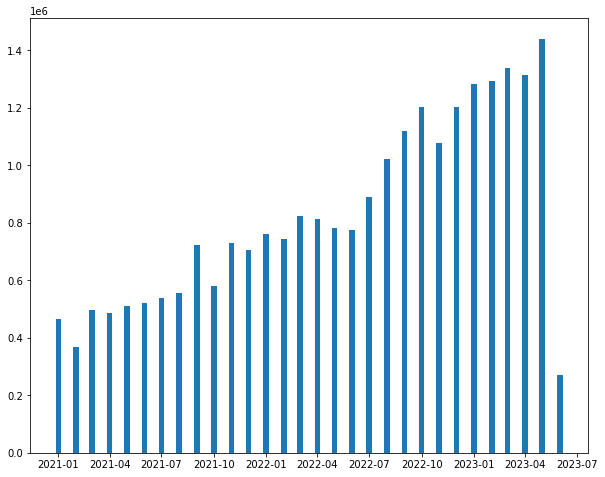

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.bar(x,y.reshape(1,-1)[0],width=10)

# Exibindo usinas solares e eolicas

In [13]:
group_by_usina_solar = main_df.sort_index().query('nom_tipousina=="Solar"').groupby(['nom_usina_conjunto', 'id_estado']).agg({'val_capacidadeinstalada':'last', 'val_latitudesecoletora':'last', 'val_longitudesecoletora':'last'}).sort_values(by='val_capacidadeinstalada',ascending=False)

In [62]:
group_by_usina_eolica = main_df.sort_index().query('nom_tipousina=="Eólica"').groupby(['nom_usina_conjunto', 'id_estado']).agg({'val_capacidadeinstalada':'last', 'val_latitudesecoletora':'last', 'val_longitudesecoletora':'last'}).sort_values(by='val_capacidadeinstalada',ascending=False)

<AxesSubplot:>

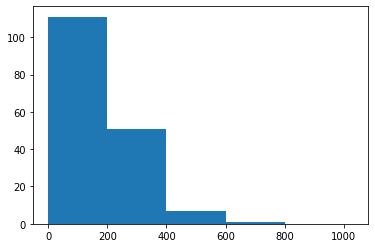

In [82]:
group_by_usina_eolica['val_capacidadeinstalada'].dropna().hist(grid=False, bins=[0,200,400,600,800,1030])

<AxesSubplot:>

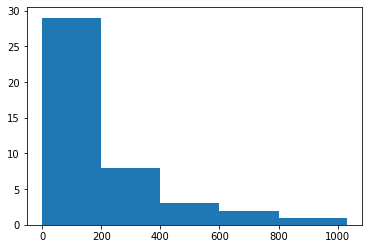

In [83]:
group_by_usina_solar['val_capacidadeinstalada'].dropna().hist(grid=False, bins=[0,200,400,600,800,1030])

In [84]:
group_by_usina_solar[['val_capacidadeinstalada']].dropna().sum()

val_capacidadeinstalada    8818.061933
dtype: float64

In [15]:
group_by_usina_solar

,,val_capacidadeinstalada,val_latitudesecoletora,val_longitudesecoletora
nom_usina_conjunto,id_estado,,,
Conj. Janaúba,MG,1020.360000,-15.946560,-43.508374
Conj. Futura,BA,692.445600,-9.660782,-40.686021
Conj. Sol do Cerrado,MG,640.100000,NaN,NaN
Conj. São Gonçalo,PI,575.725333,-10.103855,-45.282352
Conj. Lar do Sol,MG,494.970000,-17.363171,-44.696978
Conj. Sol do Sertão,BA,415.030000,-12.239130,-42.610434
Conj. Pirapora,MG,329.000000,-17.405600,-44.922500
Conj. Alex,CE,278.397000,-5.269671,-37.967945
Conj. Serra do Mel C,RN,240.590000,-5.131425,-37.049532


In [86]:
group_by_usina_solar.dropna().groupby(['id_estado']).agg(n_usinas_solares=('val_capacidadeinstalada', 'count'))

,n_usinas_solares
id_estado,
BA,10
CE,5
MG,7
PB,2
PE,3
PI,5
RN,3
SP,6


In [63]:
group_by_usina_eolica['val_capacidadeinstalada'].sort_index().sum()

29020.569200000005

In [61]:
group_by_usina_eolica.dropna().groupby(['id_estado']).agg(n_usinas_eolicas=('val_capacidadeinstalada', 'count'))

NameError: name 'group_by_usina_eolica' is not defined

In [60]:
group_by_usina_eolica

NameError: name 'group_by_usina_eolica' is not defined

In [241]:
group_by_usina_eolica[['val_capacidadeinstalada']].sum()

val_capacidadeinstalada    29330.2692
dtype: float64

In [217]:
group_by_usina_eolica.apply(lambda x: x.name[0], axis=1)

nom_usina_conjunto             id_estado
Conj. Lagoa dos Ventos         PI                  Conj. Lagoa dos Ventos
Conj. Santa Vitória do Palmar  RS           Conj. Santa Vitória do Palmar
Conj. Serra do Mel             RN                      Conj. Serra do Mel
Conj. Oitis                    PI                             Conj. Oitis
Conj. Rio do Vento             RN                      Conj. Rio do Vento
                                                        ...              
Cataventos Acaraú I            CE                     Cataventos Acaraú I
Malhadinha 1                   CE                            Malhadinha 1
Conj. Acauã                    RN                             Conj. Acauã
Conj. Ventos da Bahia          BA                   Conj. Ventos da Bahia
Conj. Ventos de São Roque B    PI             Conj. Ventos de São Roque B
Length: 172, dtype: object

In [148]:
3.8/8.8

0.43181818181818177

# Preparando dados para plotagem dos mapas

In [89]:
lon_solar = group_by_usina_solar.dropna()['val_longitudesecoletora'].values
lat_solar = group_by_usina_solar.dropna()['val_latitudesecoletora'].values
values_solar = group_by_usina_solar.dropna()['val_capacidadeinstalada'].values

In [90]:
lon_eolica = group_by_usina_eolica.dropna()['val_longitudesecoletora'].values
lat_eolica = group_by_usina_eolica.dropna()['val_latitudesecoletora'].values
values_eolica = group_by_usina_eolica.dropna()['val_capacidadeinstalada'].values

# Plotagem dos mapas

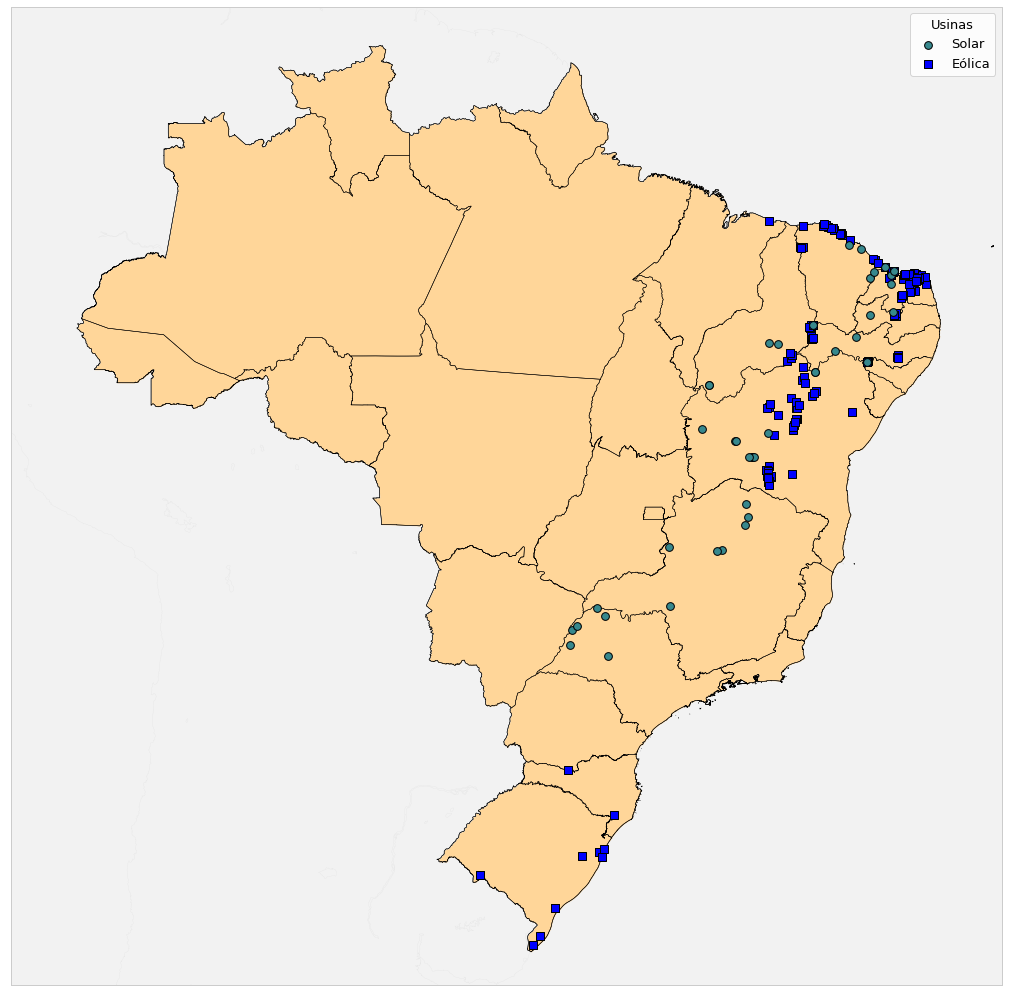

In [173]:
fig, ax = plt.subplots()

m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
            llcrnrlon=-77, urcrnrlon=-32, resolution='i')
m.ax = ax
line_color = '#cccccc'
wather_color = '#f2f2f2'

m.drawcoastlines(color=line_color, linewidth=0.1)
#m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

fig.set_size_inches(18, 18)

m.readshapefile('Brasil\\gadm41_BRA_1', 'estados', zorder=5)

m.readshapefile('Brasil\\gadm41_BRA_0', 'pais', zorder=5)



x_solar, y_solar = m(lon_solar, lat_solar)

sc = m.scatter(x_solar, y_solar, zorder=10, color='#37888D', s=60, linewidths=1, edgecolor='black',)



x_eolica, y_eolica = m(lon_eolica, lat_eolica)

sc = m.scatter(x_eolica, y_eolica, zorder=9, marker='s', color='blue', s=60, linewidths=1, edgecolor='black',)


patches = [Polygon(np.array(m.pais[0]))]

pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
ax.add_collection(pc)


markers=['o','s']
colors=['#37888D', 'blue']
h = [plt.scatter([],[], color=colors[j], marker=markers[j], s=i, edgecolors='k') for j,i in enumerate([60,60])]
leg = plt.legend(handles=h, labels=['Solar','Eólica'],loc='upper right', title="Usinas", fontsize=13,title_fontsize=13)

#leg._legend_box.align = "center"


plt.savefig('FIGURAS\\MAPA_S.svg')

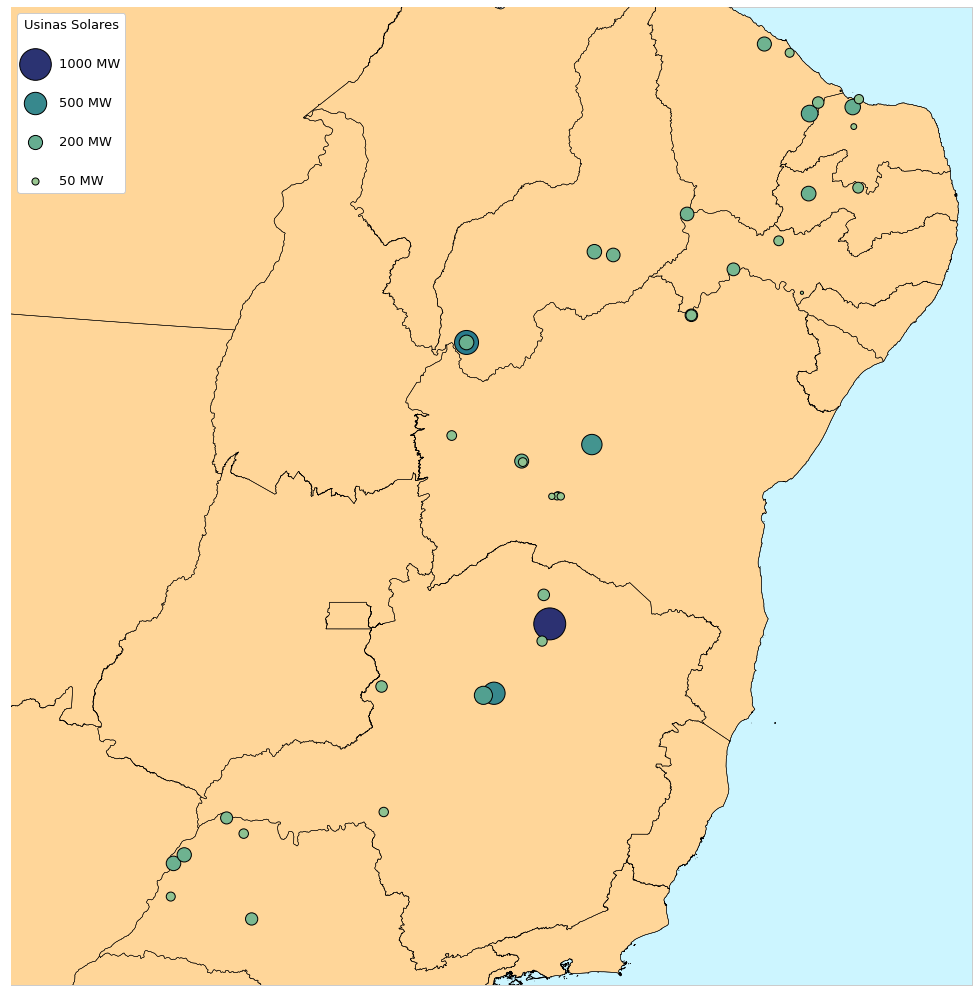

In [172]:
fig, ax = plt.subplots()

m = Basemap(projection='merc', llcrnrlat=-23.2, urcrnrlat=-3,
            llcrnrlon=-55, urcrnrlon=-34.5, resolution='i')
m.ax = ax
line_color = '#cccccc'
wather_color = '#ccf5ff'

m.drawcoastlines(color=line_color, linewidth=0.1)
#m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

fig.set_size_inches(18, 18)

m.readshapefile('Brasil\\gadm41_BRA_1', 'estados', zorder=5)

m.readshapefile('Brasil\\gadm41_BRA_0', 'pais', zorder=5)

x_solar, y_solar = m(lon_solar, lat_solar)

sc = m.scatter(x_solar, y_solar, s=values_solar, c=values_solar, zorder=10, cmap=sns.color_palette("crest", as_cmap=True)
, linewidths=1, edgecolor='black',)

patches = [Polygon(np.array(m.pais[0]))]

pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
ax.add_collection(pc)

colors = ['#2B3372', '#37888D', '#66AD90', '#99C791']

h = [plt.scatter([],[], color=colors[j], marker="o", s=i, edgecolors='k') for j,i in enumerate([1000,500,200,50])]
leg = plt.legend(handles=h, labels=['1000 MW', '500 MW','200 MW','50 MW'],loc='upper left', title="Usinas Solares", labelspacing=2, fontsize=13,title_fontsize=13, framealpha=1)



plt.savefig('FIGURAS\\MAPA_B.svg')

In [93]:
# fig, ax = plt.subplots()

# m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=7,
#             llcrnrlon=-77, urcrnrlon=-32, resolution='i')
# m.ax = ax
# line_color = '#cccccc'
# wather_color = '#ffffff'

# m.drawcoastlines(color=line_color, linewidth=0.1)
# #m.fillcontinents(color=line_color,lake_color=wather_color, zorder=1)
# m.drawmapboundary(color=line_color, fill_color=wather_color, zorder=0)

# fig.set_size_inches(18.5, 10.5)

# m.readshapefile('Brasil\\gadm41_BRA_1', 'estados', zorder=5)

# m.readshapefile('Brasil\\gadm41_BRA_0', 'pais', zorder=5)

# x_solar, y = m(lon_solar, lat_solar)

# sc = m.scatter(x_solar, y, s=values_solar, c=values_solar, zorder=10, cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True)
# , linewidths=1, edgecolor='black',)

# patches = [Polygon(np.array(m.pais[0]))]

# pc = PatchCollection(patches, facecolor= '#ffd699', edgecolor='k', linewidths=0.01, zorder=2)
# ax.add_collection(pc)

# h = [plt.scatter([],[], color="#0059b3", marker="o", s=i, edgecolors='k') for i in [1000,500,200,50]]
# leg = plt.legend(handles=h, labels=['1000 MW', '500 MW','200 MW','50 MW'],loc='lower left', title="Usinas Fotovoltaicas", labelspacing=2, fontsize=13,title_fontsize=13)

# leg._legend_box.align = "center"


# plt.savefig('FIGURAS\\MAPA.svg')

In [94]:
lista_usinas = group_by_usina_solar.index.get_level_values('nom_usina_conjunto')

# Evolução de capacidade instalada

In [53]:
plot_df = pd.DataFrame()
plot_df['Solar'] = main_df.sort_index().query('nom_tipousina=="Solar"').groupby(['din_instante']).agg({'val_capacidadeinstalada':'sum'})['val_capacidadeinstalada']

plot_df['Eólica'] = main_df.sort_index().query('nom_tipousina=="Eólica"').groupby(['din_instante']).agg({'val_capacidadeinstalada':'sum'})['val_capacidadeinstalada']

In [56]:
plot_df.resample('YS').max()

,Solar,Eólica
din_instante,,
2018-01-01,1734.400000,13619.8102
2019-01-01,2332.325333,14333.5702
2020-01-01,2924.935333,16185.6902
2021-01-01,4386.062333,19748.2252
2022-01-01,6701.426333,24279.3352
2023-01-01,8650.061933,25434.0052


In [18]:
main_df.query('nom_tipousina=="Solar"').groupby(['din_instante']).agg({'val_capacidadeinstalada':'sum'})

,val_capacidadeinstalada
din_instante,
2018-01-01 00:00:00,882.000000
2018-01-01 01:00:00,882.000000
2018-01-01 02:00:00,882.000000
2018-01-01 03:00:00,882.000000
2018-01-01 04:00:00,882.000000
...,...
2023-06-06 19:00:00,8818.061933
2023-06-06 20:00:00,8818.061933
2023-06-06 21:00:00,8818.061933


In [19]:
group_by_usina_solar.head(6)[['val_capacidadeinstalada']]

,,val_capacidadeinstalada
nom_usina_conjunto,id_estado,
Conj. Janaúba,MG,1020.360000
Conj. Futura,BA,692.445600
Conj. Sol do Cerrado,MG,640.100000
Conj. São Gonçalo,PI,575.725333
Conj. Lar do Sol,MG,494.970000
Conj. Sol do Sertão,BA,415.030000


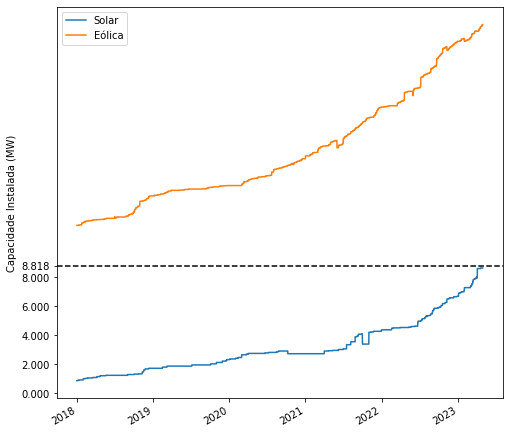

In [57]:
fig, ax = plt.subplots()
(plot_df/1000).loc[(plot_df/1000)['Solar']>0.05].plot(xlabel='', ylabel='Capacidade Instalada (MW)', figsize=(8,8), ax=ax)
ax.set_yticks([0,2,4,6,8] + [8818.061933/1000])
ax.axhline(y=8818.061933/1000, linestyle='--', color='k', )
plt.savefig('FIGURAS/evolução_capacidade_instalada.svg')


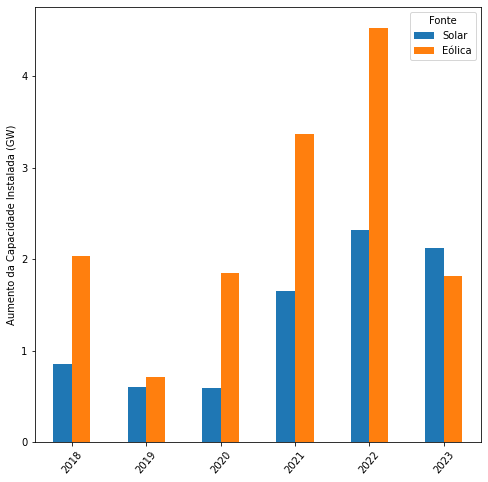

In [23]:
fig, ax = plt.subplots()
(plot_df/1000).resample('Y').agg([lambda x: x.max() - x[0]]).plot(kind='bar', ax=ax, xlabel='', figsize=(8,8))

lista_ticks = plot_df.resample('Y').agg(['first','last']).index

ax.set_xticklabels([datetime.datetime.strftime(data, '%Y') for data in lista_ticks])

ax.legend(title='Fonte', labels=['Solar','Eólica'])

ax.xaxis.set_tick_params(rotation=50)
ax.set_ylabel('Aumento da Capacidade Instalada (GW)')
plt.savefig('FIGURAS/comparação eol-solar.svg')

In [100]:
main_df.query('nom_tipousina=="Eólica"').groupby(['din_instante']).agg({'val_capacidadeinstalada':'sum'})

,val_capacidadeinstalada
din_instante,
2018-01-01 00:00:00,11587.8602
2018-01-01 01:00:00,11587.8602
2018-01-01 02:00:00,11587.8602
2018-01-01 03:00:00,11587.8602
2018-01-01 04:00:00,11587.8602
...,...
2023-05-15 19:00:00,25092.6152
2023-05-15 20:00:00,25092.6152
2023-05-15 21:00:00,25092.6152


In [176]:
group_by_usina_solar.count()

val_capacidadeinstalada    43
val_latitudesecoletora     42
val_longitudesecoletora    42
dtype: int64

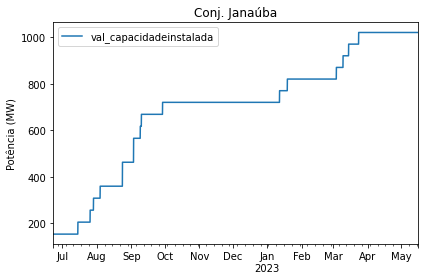

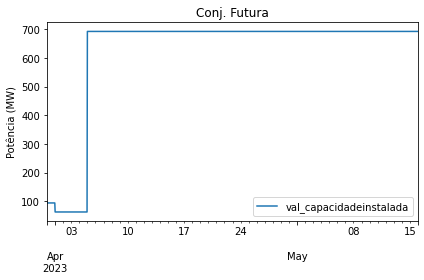

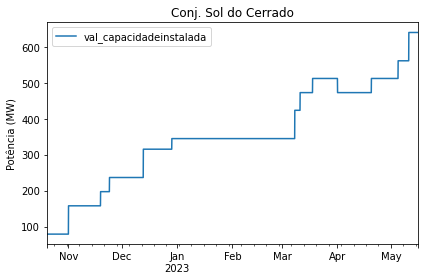

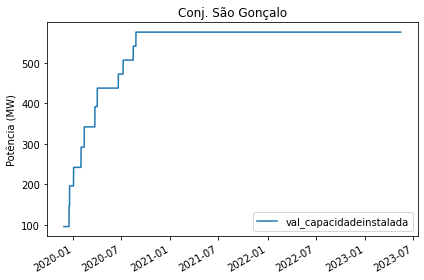

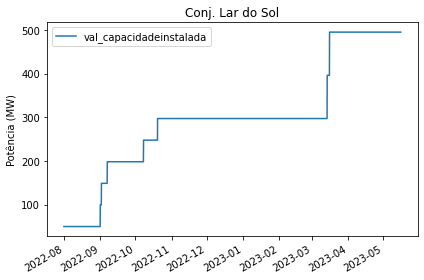

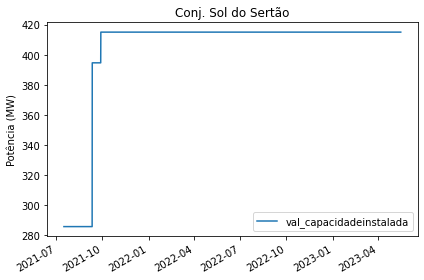

In [198]:
nome_conj = 'Conj. Janaúba'
conjunto_janauba_df[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', xlabel='', title=nome_conj)
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')
nome_conj = 'Conj. Futura'
main_df.pipe(get_usina_solar_pipeline, nome_usina=nome_conj)[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', title=nome_conj, xlabel='')
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')
nome_conj = 'Conj. Sol do Cerrado'
main_df.pipe(get_usina_solar_pipeline, nome_usina=nome_conj)[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', title=nome_conj, xlabel='')
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')
nome_conj = 'Conj. São Gonçalo'
main_df.pipe(get_usina_solar_pipeline, nome_usina=nome_conj)[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', title=nome_conj, xlabel='')
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')
nome_conj = 'Conj. Lar do Sol'
main_df.pipe(get_usina_solar_pipeline, nome_usina=nome_conj)[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', title=nome_conj, xlabel='')
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')
nome_conj = 'Conj. Sol do Sertão'
main_df.pipe(get_usina_solar_pipeline, nome_usina=nome_conj)[['val_capacidadeinstalada']].plot(ylabel='Potência (MW)', title=nome_conj, xlabel='')
plt.tight_layout()
plt.savefig(f'FIGURAS/{nome_conj}.svg')


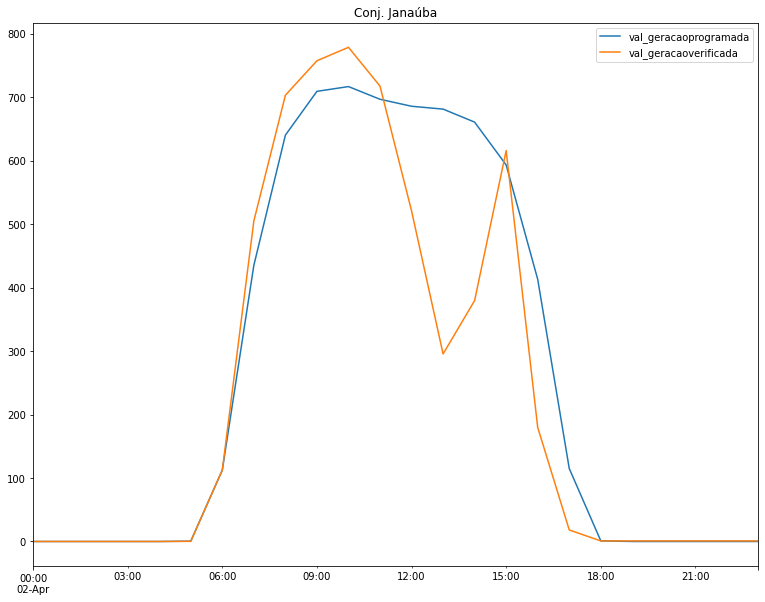

In [201]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==2)&(x.index.month==4)&(x.index.year==2023)].plot(figsize=(13, 10), title='Conj. Janaúba', xlabel='')
plt.savefig('janauba_2.svg')

In [ ]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==2)&(x.index.month==4)&(x.index.year==2023)].plot(figsize=(13, 10), xlabel='')

# Plot de dias específicos onde grandes usinas solares tiveram grande variação na geração

<AxesSubplot:xlabel='din_instante', ylabel='Potência (MW)'>

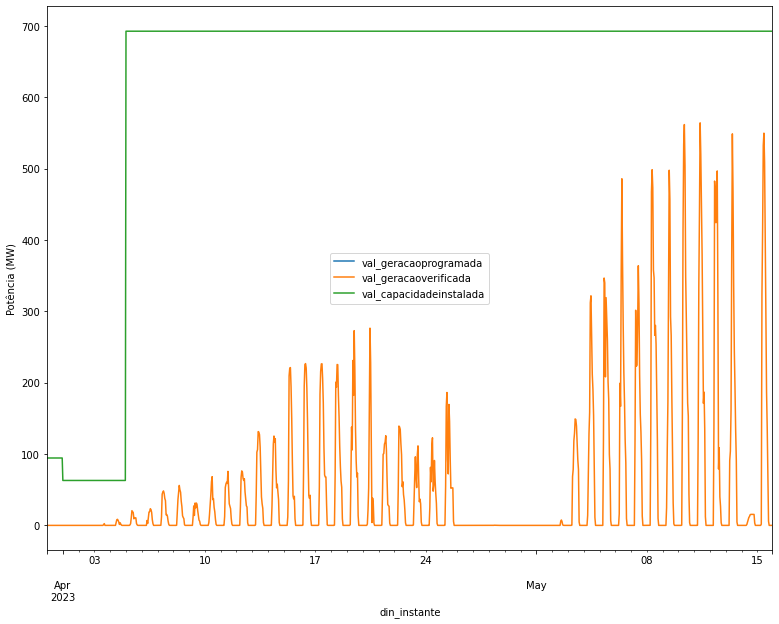

In [202]:
main_df.pipe(get_usina_solar_pipeline, nome_usina='Conj. Futura')[['val_geracaoprogramada','val_geracaoverificada','val_capacidadeinstalada']].plot( ylabel='Potência (MW)', figsize=(13, 10))

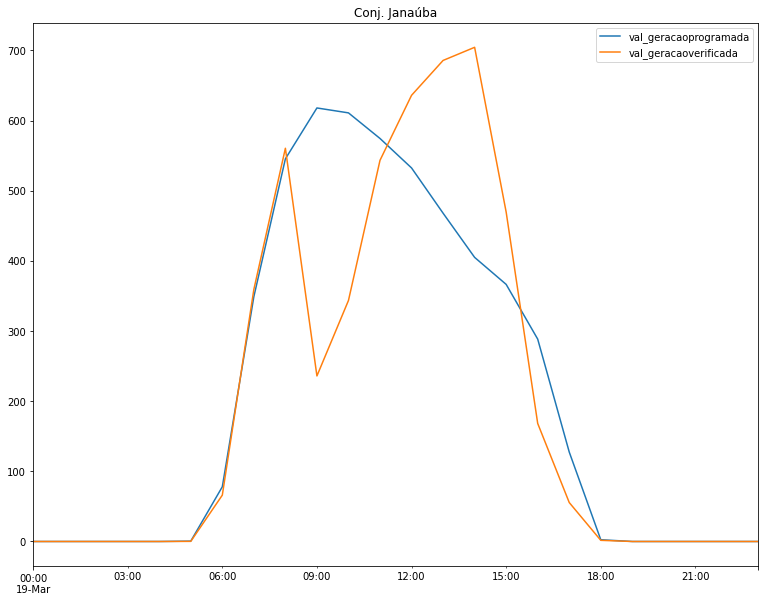

In [200]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==19)&(x.index.month==3)].plot(figsize=(13,10), title='Conj. Janaúba', xlabel='')
plt.savefig('janauba_1.svg')

<AxesSubplot:xlabel='din_instante'>

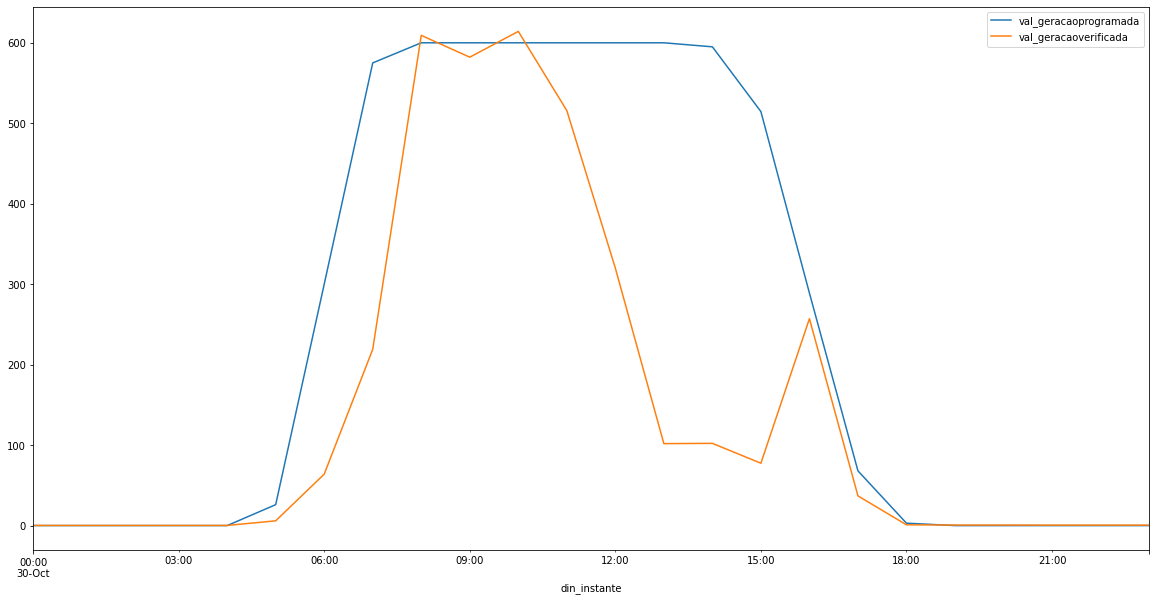

In [106]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==30)&(x.index.month==10)].plot(figsize=(20,10))

<AxesSubplot:xlabel='din_instante'>

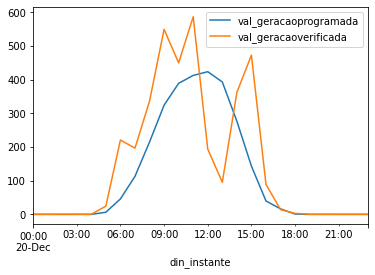

In [107]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==20)&(x.index.month==12)].plot()

<AxesSubplot:xlabel='din_instante'>

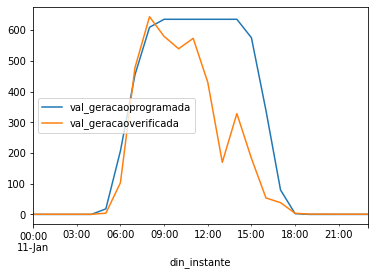

In [108]:
conjunto_janauba_df[['val_geracaoprogramada','val_geracaoverificada']].loc[lambda x: (x.index.day==11)&(x.index.month==1)&(x.index.year==2023)].plot()